<a href="https://colab.research.google.com/github/aimbsg/EVA4_S12/blob/master/EVA4_S12_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Assignment B : 
Download 50 images from the internet
Annotate via vgg Annotator - http://www.robots.ox.ac.uk/~vgg/software/via/via_demo.html
Download the json file
Preprocess -Normalising bb_width and bb_height
Find Optimal clusters using elbow method 
Plot the graph

Json description :
   1. info - file information like name, creation date, description,version.
   2. images - information about images
        * id - unique value
        * width    - width of the image
        * height - height of the image
        * file_name    - name of the file
        * license    - license
        * date_captured - date of image capture
   3   annotation - 
        * id  - unique annotation identifier
        * image_id - unique image identifier
        * segmentation- Co-Ordinates of the bounding box.
        * area- area of bounding box
        * bbox - 4 points. top-left x point,top-left y point, width of bbox, height of bbox 
        * iscrowd - One image or multiple images annotated 
   4   license
   5   Categories - Information of the annotated field like class = dog
       Each category has id , name, supercategory       

In [0]:
import pandas as pd
import json

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [0]:
%cd '/content/gdrive/My Drive/EVA4_S12_TinyImageNet/'

/content/gdrive/My Drive/EVA4_S12_TinyImageNet


In [0]:
json_input = json.load(open('via_export_coco.json'))

In [0]:
json_input.keys()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])

In [0]:
json_input.values()

dict_values([{'year': 2020, 'version': '1', 'description': 'Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)', 'contributor': '', 'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/', 'date_created': 'Tue Apr 21 2020 16:25:52 GMT+0530 (India Standard Time)'}, [{'id': 0, 'width': 275, 'height': 183, 'file_name': 'img_1.jfif', 'license': 1, 'date_captured': ''}, {'id': 1, 'width': 282, 'height': 179, 'file_name': 'img_2.jfif', 'license': 1, 'date_captured': ''}, {'id': 2, 'width': 275, 'height': 183, 'file_name': 'img_3.jfif', 'license': 1, 'date_captured': ''}, {'id': 3, 'width': 272, 'height': 185, 'file_name': 'img_4.jfif', 'license': 1, 'date_captured': ''}, {'id': 4, 'width': 264, 'height': 191, 'file_name': 'img_5.jfif', 'license': 1, 'date_captured': ''}, {'id': 5, 'width': 274, 'height': 184, 'file_name': 'img_6.jfif', 'license': 1, 'date_captured': ''}, {'id': 6, 'width': 194, 'height': 259, 'file_name': 'img_7.jfif', 'license': 1, 'date_captu

In [0]:
images = pd.DataFrame(json_input['images'])
annotations = pd.DataFrame(json_input['annotations'])

In [0]:
images.head()

,id,width,height,file_name,license,date_captured
0,0,275,183,img_1.jfif,1,
1,1,282,179,img_2.jfif,1,
2,2,275,183,img_3.jfif,1,
3,3,272,185,img_4.jfif,1,
4,4,264,191,img_5.jfif,1,


In [0]:
annotations.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,0,0,1,"[42, 30, 218, 30, 218, 169, 42, 169]",24464,"[42, 30, 176, 139]",0
1,1,1,1,"[58, 34, 272, 34, 272, 167, 58, 167]",28462,"[58, 34, 214, 133]",0
2,2,2,1,"[34, 24, 249, 24, 249, 152, 34, 152]",27520,"[34, 24, 215, 128]",0
3,3,3,1,"[50, 14, 200, 14, 200, 168, 50, 168]",23100,"[50, 14, 150, 154]",0
4,4,4,1,"[6, 2, 249, 2, 249, 187, 6, 187]",44955,"[6, 2, 243, 185]",0


In [0]:
bb_x = []
bb_y = []
bb_width = []
bb_height = []
bb_list = list(annotations['bbox'])
print(len(bb_list))
print(bb_list[0])

49
[42, 30, 176, 139]


In [0]:
for i in bb_list:  
  bb_x.append(i[0])
  bb_y.append(i[1])
  bb_width.append(i[2])
  bb_height.append(i[3])
annotations['bb_x'] = bb_x
annotations['bb_y'] = bb_y
annotations['bb_width'] = bb_width
annotations['bb_height'] = bb_height  

In [0]:
annotations.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd,bb_x,bb_y,bb_width,bb_height
0,0,0,1,"[42, 30, 218, 30, 218, 169, 42, 169]",24464,"[42, 30, 176, 139]",0,42,30,176,139
1,1,1,1,"[58, 34, 272, 34, 272, 167, 58, 167]",28462,"[58, 34, 214, 133]",0,58,34,214,133
2,2,2,1,"[34, 24, 249, 24, 249, 152, 34, 152]",27520,"[34, 24, 215, 128]",0,34,24,215,128
3,3,3,1,"[50, 14, 200, 14, 200, 168, 50, 168]",23100,"[50, 14, 150, 154]",0,50,14,150,154
4,4,4,1,"[6, 2, 249, 2, 249, 187, 6, 187]",44955,"[6, 2, 243, 185]",0,6,2,243,185


In [0]:
df_input = pd.merge(images, annotations, how='inner',on='id')

In [0]:
df_input.drop(df_input.columns[[0,3,4,5,6,7,8,9,10,11,12,13]], axis = 1, inplace = True)

In [0]:
df_input.head()

,width,height,bb_width,bb_height
0,275,183,176,139
1,282,179,214,133
2,275,183,215,128
3,272,185,150,154
4,264,191,243,185


Normalize

In [0]:
df_input['bb_width'] = df_input['bb_width'].div(df_input['width'])
df_input['bb_height'] = df_input['bb_height'].div(df_input['height'])
df_input['width'] = df_input['width'].div(df_input['width'])
df_input['height'] = df_input['height'].div(df_input['height'])
df_input.head()

,width,height,bb_width,bb_height
0,1.0,1.0,0.640000,0.759563
1,1.0,1.0,0.758865,0.743017
2,1.0,1.0,0.781818,0.699454
3,1.0,1.0,0.551471,0.832432
4,1.0,1.0,0.920455,0.968586


In [0]:
df_input.drop(['width', 'height'], axis = 1, inplace=True)
df_input.head()

,bb_width,bb_height
0,0.640000,0.759563
1,0.758865,0.743017
2,0.781818,0.699454
3,0.551471,0.832432
4,0.920455,0.968586


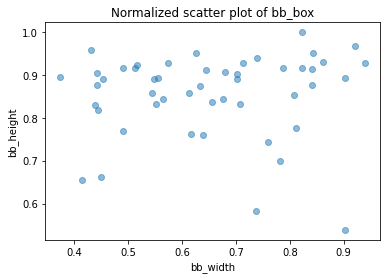

In [0]:
import matplotlib.pyplot as plt
plt.scatter(df_input['bb_width'], df_input['bb_height'], alpha=0.5)
plt.title('Normalized scatter plot of bb_box')
plt.xlabel('bb_width')
plt.ylabel('bb_height')
plt.show()

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

distortions = [] 
inertias = [] 

K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(df_input) 
    kmeanModel.fit(df_input)           
    distortions.append(sum(np.min(cdist(df_input, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df_input.shape[0]) 
    inertias.append(kmeanModel.inertia_)

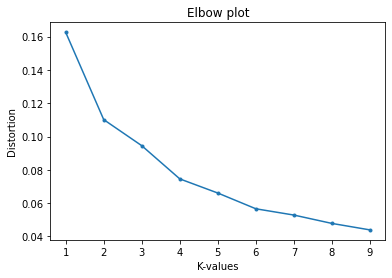

In [0]:
plt.plot(K, distortions, '.-')
plt.xlabel('K-values')
plt.ylabel('Distortion')
plt.title('Elbow plot')
plt.show()